# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Import Data

In [2]:
df = pd.read_csv('telecom_churn.csv', sep=',')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


# Data Processing

In [3]:
target_col = ['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']

In [4]:
def outlier_handler(df, col, threshold=4):
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())  # Calculate Z-scores for the specified column
    df = df[z_scores < threshold]  # Keep rows where Z-score is below the threshold for the column
    return df

for col in target_col:
    df = outlier_handler(df, col) 

df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3331 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3331 non-null   int64  
 1   AccountWeeks     3331 non-null   int64  
 2   ContractRenewal  3331 non-null   int64  
 3   DataPlan         3331 non-null   int64  
 4   DataUsage        3331 non-null   float64
 5   CustServCalls    3331 non-null   int64  
 6   DayMins          3331 non-null   float64
 7   DayCalls         3331 non-null   int64  
 8   MonthlyCharge    3331 non-null   float64
 9   OverageFee       3331 non-null   float64
 10  RoamMins         3331 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 312.3 KB


In [6]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [7]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000,3331.000000
mean,0.144701,101.065746,0.903032,0.276794,0.816875,1.562294,179.883038,100.495947,56.328760,10.052243,10.239237
std,0.351852,39.834027,0.295958,0.447481,1.272940,1.315172,54.305209,19.923553,16.402522,2.536208,2.791546
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.600000,30.000000,15.700000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.600000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.500000,114.000000,66.250000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Exploratory Data Analysis

In [8]:
df_copy = df.copy()

In [9]:
columns = df.columns

## Data Distribution

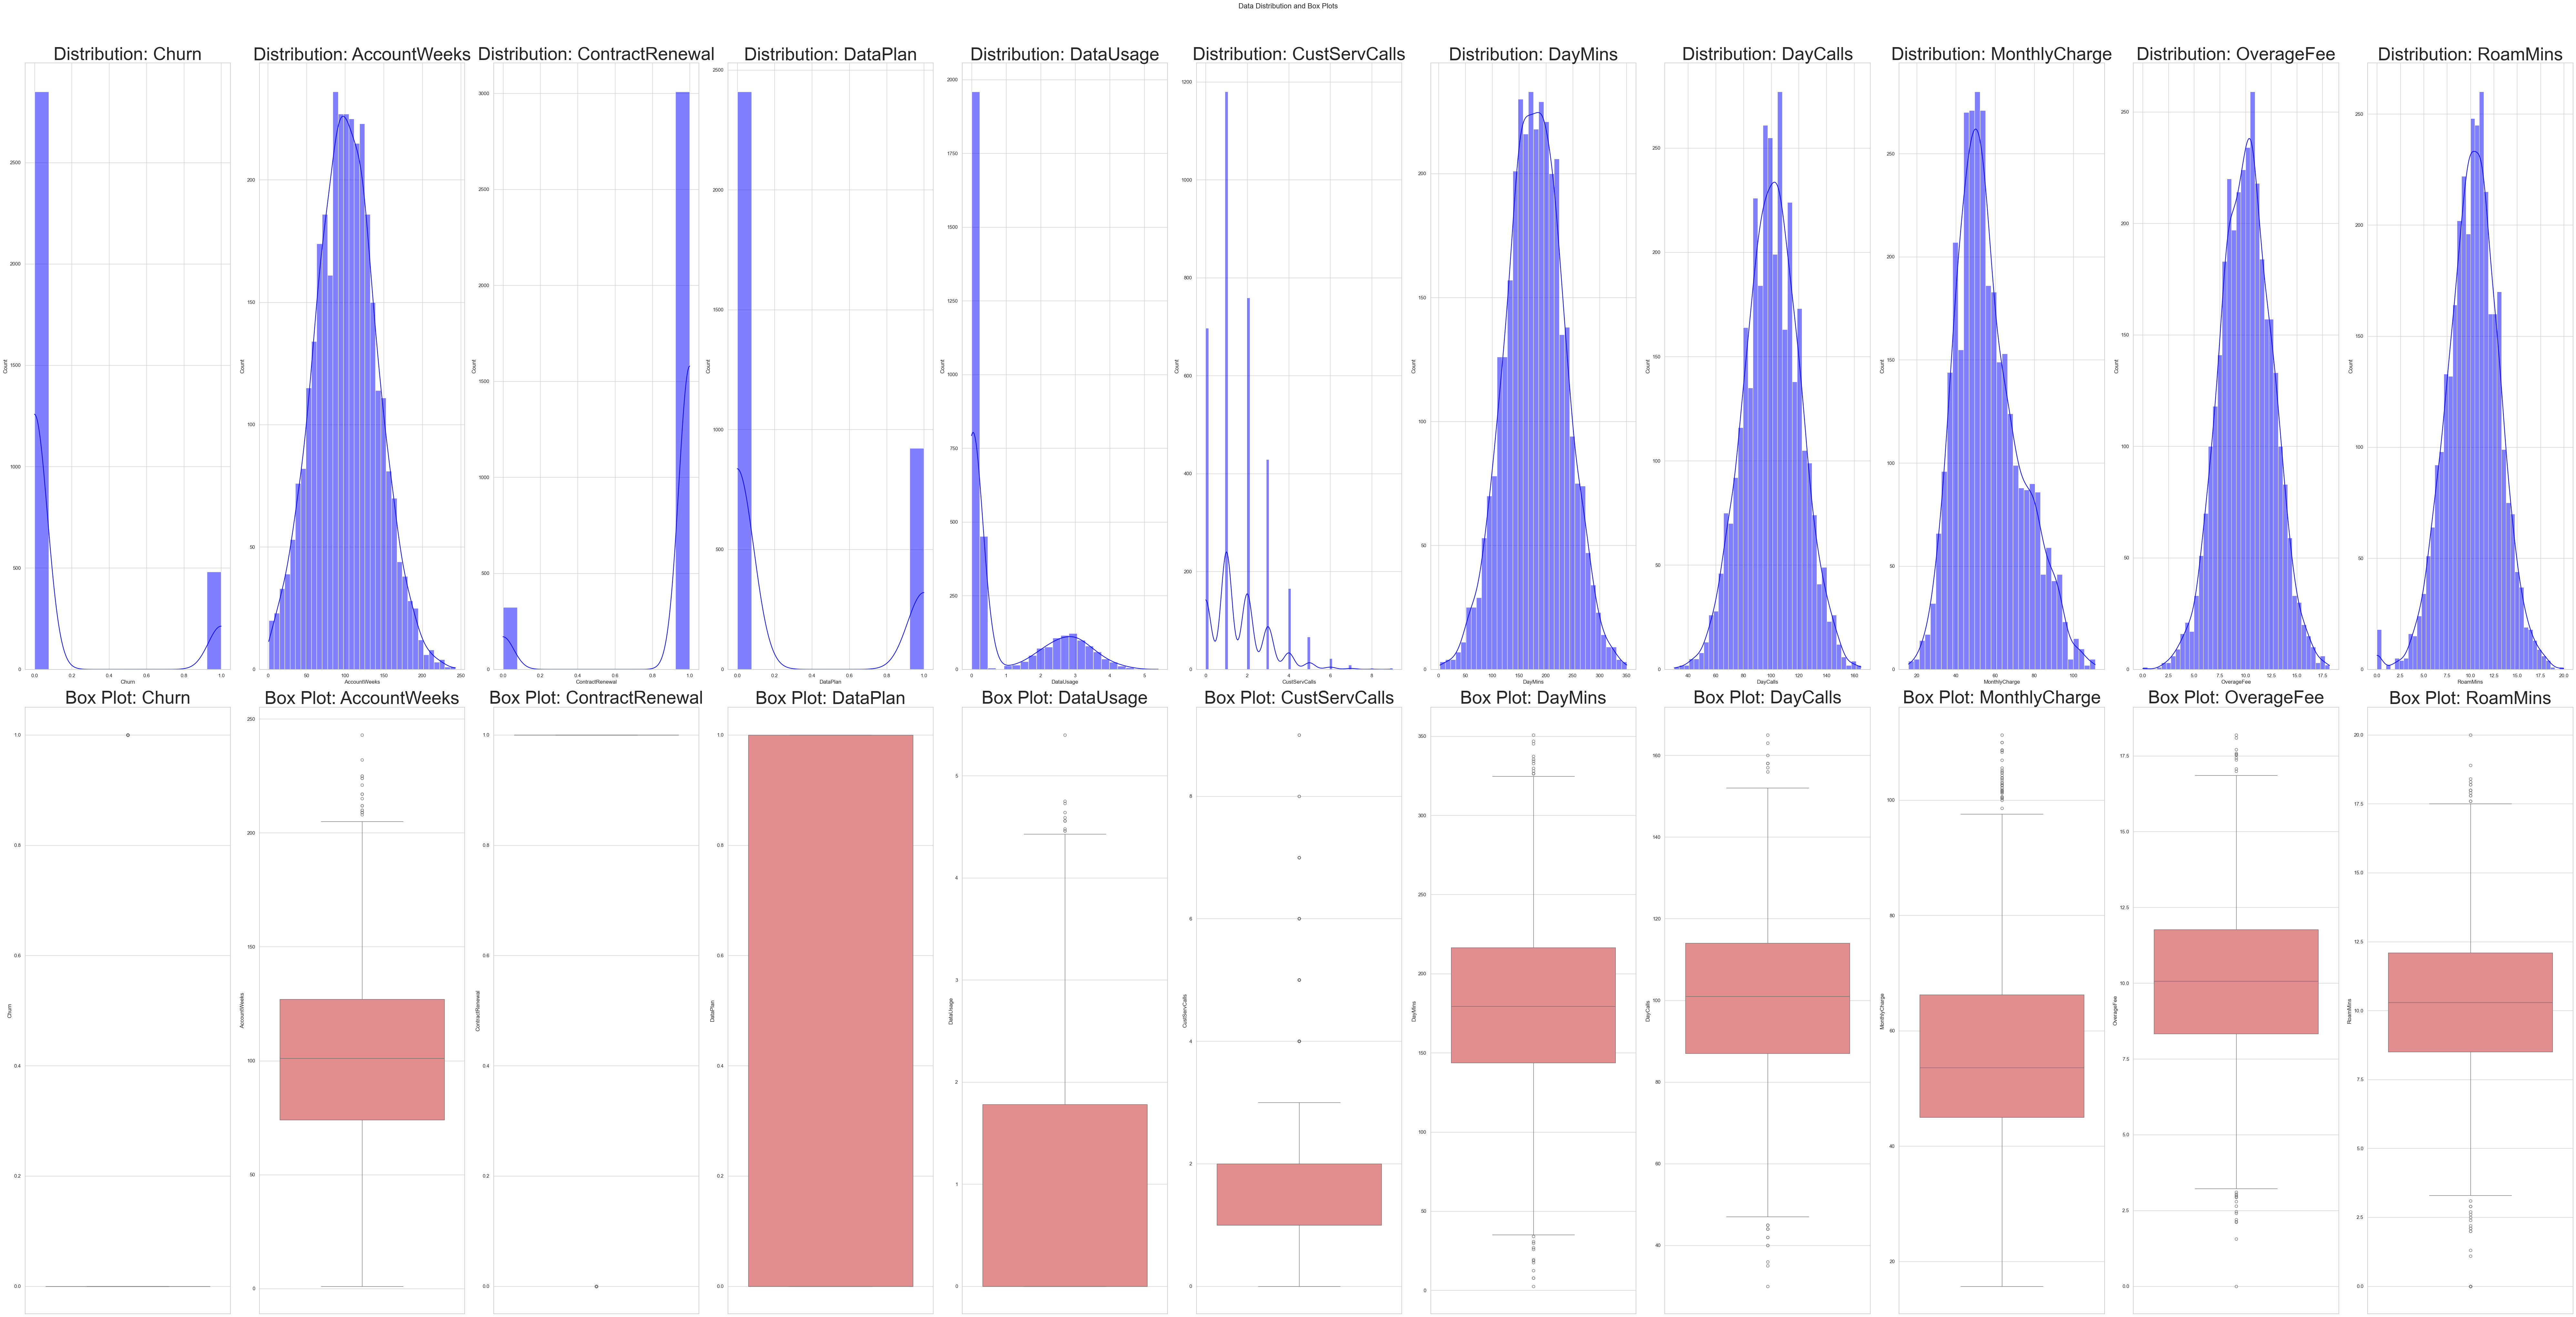

In [10]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=len(columns), figsize=(80, 40))
fig.suptitle("Data Distribution and Box Plots", fontsize=16, y=1.02)

for i, col in enumerate(columns):
    # Distribution Plot
    sns.histplot(df_copy[col], kde=True, ax=axes[0, i], color="blue")
    axes[0, i].set_title(f"Distribution: {col}", fontsize=40)
    
    # Box Plot
    sns.boxplot(y=df_copy[col], ax=axes[1, i], color="lightcoral")
    axes[1, i].set_title(f"Box Plot: {col}", fontsize=40)

plt.tight_layout()
plt.show()

# Data Splitting

In [11]:
X = df.iloc[:, 1:]
y = df['Churn']

In [12]:
X

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [13]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3331, dtype: int64

# Feature Engineering

In [14]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Train-Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [16]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

# Prediction

In [17]:
y_pred = model.predict(X_test)

# Evaluation

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 92.20%


### Log Loss Formula (Binary Classification)

Log Loss = -(1/N) * Σ [ y * log(p) + (1 - y) * log(1 - p) ]

Where:  
- N = number of samples  
- y = actual label (0 or 1)  
- p = predicted probability of class 1  

In [ ]:
# Log Loss
from sklearn.metrics import log_loss

y_pred_proba_0 = model.predict_proba(X_test)[:, 0]  
loss_0 = log_loss(y_test, y_pred_proba_0)  

y_pred_proba_1 = model.predict_proba(X_test)[:, 1]  
loss_1 = log_loss(y_test, y_pred_proba_1)  

print(f'Log Loss for Class 0: {loss_0:.4f}')
print(f'Log Loss for Class 1: {loss_1:.4f}')

Log Loss for Class 0: 23.8089
Log Loss for Class 1: 0.8508


## Confusion Matrix 

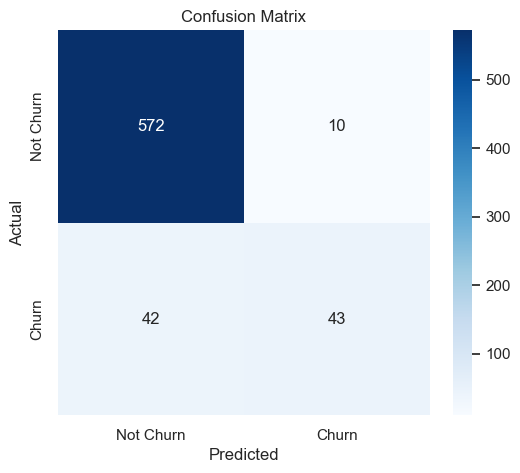

In [20]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()